# IMPORTING LIBRARIES

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# READING DATASET

In [4]:
df = pd.read_csv("mi_data.csv")
df

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery
0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,"₹13,500",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G LTE,Battery Capacity6000 mAh
1,"REDMI 10 Power (Power Black, 128 GB)",4.2,"₹12,840",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G VoLTE,Battery Capacity6000 mAh
2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,"₹7,520",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM2 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",Battery Capacity5000 mAh
3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,450",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G V...",Battery Capacity5000 mAh
4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,"₹21,644",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,"Network Type5G, 4G VOLTESupported Networks5G, ...",Battery Capacity4250 mAhBattery TypeLi-Po
...,...,...,...,...,...,...,...,...
543,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,"₹26,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Lollipop 5.1Processor ...,"Network Type3G, 4GSupported NetworksGSM, 4G LT...",Battery Capacity4050 mAhBattery TypeLi-Polymer
544,"Redmi Note 3 (Gold, 32 GB)",4.1,"₹8,999",https://rukminim2.flixcart.com/image/312/312/m...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Pie 9Processor CoreOct...,Network Type4G VOLTESupported Networks4G LTEBl...,Battery Capacity4000 mAhBattery Typelithium-ion
545,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,"₹11,990",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM6 GB,Operating SystemAndroid Nougat 11Processor Cor...,"Network Type4G VOLTE, 5GSupported Networks4G V...",Battery Capacity4520 mAh
546,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,"₹24,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,"Network Type3G, 4G VOLTE, 4GSupported Networks...",Battery Capacity4000 mAh


In [5]:
df.shape

(548, 8)

In [22]:
df.head()

,model_names,price,storage_ram,os_processor,network,battery
0,"REDMI 10 Power (Sporty Orange, 128 GB)",13500,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G LTE,Battery Capacity6000 mAh
1,"REDMI 10 Power (Power Black, 128 GB)",12840,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G VoLTE,Battery Capacity6000 mAh
2,"Redmi 9A Sport (Metallic Blue, 32 GB)",7520,Internal Storage32 GBRAM2 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",Battery Capacity5000 mAh
3,"Redmi 9A Sport (Coral Green, 32 GB)",8450,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G V...",Battery Capacity5000 mAh
4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",21644,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,"Network Type5G, 4G VOLTESupported Networks5G, ...",Battery Capacity4250 mAhBattery TypeLi-Po


In [24]:
df.sample(5)

,model_names,price,storage_ram,os_processor,network,battery
410,"REDMI Note 8 Pro (Halo White, 128 GB)",17999,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid Pie 9Processor TypeMed...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",Battery Capacity4500 mAhBattery Typelithium-io...
547,"Redmi Note 5 Pro (Red, 64 GB)",12500,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",Battery Capacity3080 mAh
437,"Xiaomi 11Lite NE (Diamond Dazzle, 256 GB)",42990,Internal Storage256 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid Q 11Processor CoreDual...,Network Type5GSupported Networks5G,Battery Capacity4250 mAh
213,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",23999,Internal Storage128 GBRAM6 GBTotal Memory128 G...,Operating SystemAndroid 12Processor TypeMediat...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",Battery Capacity5000 mAhBattery TypeLithium Po...
324,"REDMI Note 9 (Shadow Black, 64 GB)",11999,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 10Processor TypeMediaT...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",Battery Capacity5020 mAhBattery TypeLithium Po...


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   model_names   548 non-null    object
 1   price         548 non-null    int64 
 2   storage_ram   548 non-null    object
 3   os_processor  548 non-null    object
 4   network       548 non-null    object
 5   battery       548 non-null    object
dtypes: int64(1), object(5)
memory usage: 25.8+ KB


# DROPPING EXTRA COLUMNS

In [6]:
df = df.drop(columns=["imgURL","ratings"])
df

,model_names,price,storage_ram,os_processor,network,battery
0,"REDMI 10 Power (Sporty Orange, 128 GB)","₹13,500",Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G LTE,Battery Capacity6000 mAh
1,"REDMI 10 Power (Power Black, 128 GB)","₹12,840",Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G VoLTE,Battery Capacity6000 mAh
2,"Redmi 9A Sport (Metallic Blue, 32 GB)","₹7,520",Internal Storage32 GBRAM2 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",Battery Capacity5000 mAh
3,"Redmi 9A Sport (Coral Green, 32 GB)","₹8,450",Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G V...",Battery Capacity5000 mAh
4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)","₹21,644",Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,"Network Type5G, 4G VOLTESupported Networks5G, ...",Battery Capacity4250 mAhBattery TypeLi-Po
...,...,...,...,...,...,...
543,"Xiaomi 11i 5G (Camo Green, 128 GB)","₹26,999",Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Lollipop 5.1Processor ...,"Network Type3G, 4GSupported NetworksGSM, 4G LT...",Battery Capacity4050 mAhBattery TypeLi-Polymer
544,"Redmi Note 3 (Gold, 32 GB)","₹8,999",Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Pie 9Processor CoreOct...,Network Type4G VOLTESupported Networks4G LTEBl...,Battery Capacity4000 mAhBattery Typelithium-ion
545,"Redmi Note 8 (Moonlight White, 32 GB)","₹11,990",Internal Storage128 GBRAM6 GB,Operating SystemAndroid Nougat 11Processor Cor...,"Network Type4G VOLTE, 5GSupported Networks4G V...",Battery Capacity4520 mAh
546,"MI 11X 5G (CELESTIAL SILVER, 128 GB)","₹24,999",Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,"Network Type3G, 4G VOLTE, 4GSupported Networks...",Battery Capacity4000 mAh


In [7]:
df.columns

Index(['model_names', 'price', 'storage_ram', 'os_processor', 'network',
       'battery'],
      dtype='object')

# CONVERTING TEXTUAL DATA INTO NUMERICAL DATA

In [8]:
text_columns = ['model_names', 'storage_ram', 'os_processor', 'network', 'battery']

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Create a new DataFrame to store vectorized columns
vectorized_data = pd.DataFrame()
for column in text_columns:
    # Apply CountVectorizer and convert to DataFrame
    column_vectorized = pd.DataFrame(
        vectorizer.fit_transform(df[column].fillna('')).toarray(),
        columns=[f"{column}_{word}" for word in vectorizer.get_feature_names_out()]
    )
    # Add vectorized data to the new DataFrame
    vectorized_data = pd.concat([vectorized_data, column_vectorized], axis=1)


In [9]:
vectorized_data.shape

(548, 739)

In [10]:
vectorized_data

,model_names_10,model_names_10a,model_names_10i,model_names_10s,model_names_10t,model_names_11,model_names_11i,model_names_11lite,model_names_11s,model_names_11t,...,battery_time31,battery_time32,battery_time33,battery_time34,battery_time36,battery_time37,battery_time41,battery_time45,battery_typeli,battery_typelithium
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# REPLACING USUSUAL SIGNS IN DATASET

In [11]:
df['price'] = df['price'].str.replace('₹', '').str.replace(',', '').astype(int)

In [12]:
df

,model_names,price,storage_ram,os_processor,network,battery
0,"REDMI 10 Power (Sporty Orange, 128 GB)",13500,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G LTE,Battery Capacity6000 mAh
1,"REDMI 10 Power (Power Black, 128 GB)",12840,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G VoLTE,Battery Capacity6000 mAh
2,"Redmi 9A Sport (Metallic Blue, 32 GB)",7520,Internal Storage32 GBRAM2 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",Battery Capacity5000 mAh
3,"Redmi 9A Sport (Coral Green, 32 GB)",8450,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G V...",Battery Capacity5000 mAh
4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",21644,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,"Network Type5G, 4G VOLTESupported Networks5G, ...",Battery Capacity4250 mAhBattery TypeLi-Po
...,...,...,...,...,...,...
543,"Xiaomi 11i 5G (Camo Green, 128 GB)",26999,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Lollipop 5.1Processor ...,"Network Type3G, 4GSupported NetworksGSM, 4G LT...",Battery Capacity4050 mAhBattery TypeLi-Polymer
544,"Redmi Note 3 (Gold, 32 GB)",8999,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Pie 9Processor CoreOct...,Network Type4G VOLTESupported Networks4G LTEBl...,Battery Capacity4000 mAhBattery Typelithium-ion
545,"Redmi Note 8 (Moonlight White, 32 GB)",11990,Internal Storage128 GBRAM6 GB,Operating SystemAndroid Nougat 11Processor Cor...,"Network Type4G VOLTE, 5GSupported Networks4G V...",Battery Capacity4520 mAh
546,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",24999,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,"Network Type3G, 4G VOLTE, 4GSupported Networks...",Battery Capacity4000 mAh


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

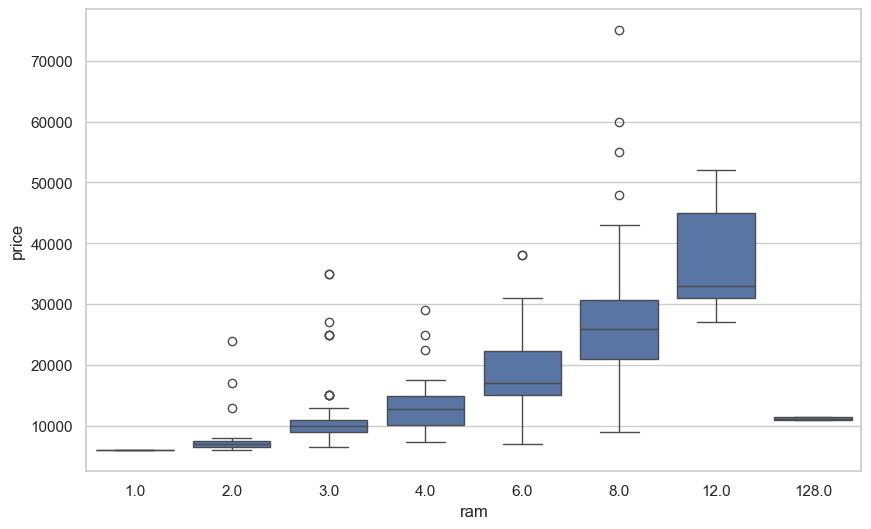

In [52]:
df['ram'] = df['storage_ram'].str.extract(r'RAM(\d+)\s?GB').astype(float)
df['battery_capacity'] = df['battery'].str.extract(r'(\d+) mAh').astype(float)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="ram", y="price")
plt.show()

# IMPORTING PCA FOR REDUCING COLUMNS

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=10)
p = pca.fit_transform(vectorized_data)
p

array([[-5.12316583,  0.72850594, -0.73139607, ...,  0.06828432,
        -0.0365531 ,  0.15260217],
       [-5.03080993,  0.62120737, -0.69979959, ...,  0.1419727 ,
        -0.35038318, -0.09260399],
       [-5.01961629,  0.47119709, -0.87912221, ...,  0.0904234 ,
         0.16913786, -0.08433746],
       ...,
       [-4.59469982,  0.69947453,  0.03793844, ..., -0.19289066,
        -0.77621381, -0.32208672],
       [ 2.49419451, -3.33052703,  2.13713475, ...,  1.32127541,
         0.68745261, -0.50414259],
       [-0.81123931, -2.21661175,  2.21949003, ...,  0.69189939,
         0.99964743, -0.05407251]], shape=(548, 10))

In [15]:
y = df["price"]
p_train,p_test,y_train,y_test = train_test_split(p,y,test_size=0.2,random_state=25)

# IMPORTING ALGORITHM

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
dtr = DecisionTreeRegressor()

In [18]:
dtr.fit(p_train,y_train)

DecisionTreeRegressor()

In [19]:
pred = dtr.predict(p_test)

# CHECKING THE ACCURACY OF THE MODEL

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(pred,y_test)

0.7267281708864396